# Create a directional wave spectrum from $cos^{2s}$ directional distribution and invert it to get two-dimensional SSH field
### Use CDIP frequency wave spectrum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

from src import *

In [8]:
# if you are connected on the web
ds_cdip = xr.open_dataset('https://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/archive/029p1/029p1_historic.nc?waveTime[0:1:405410],waveHs[0:1:405410],waveFrequency[0:1:63],waveEnergyDensity[0:1:405410][0:1:63]')

date_obs = np.datetime64('2001-11-29T00:00') # the date of the observations
ds_cdip = ds_cdip.sel(waveTime = date_obs, method = 'nearest')


In [10]:
ds_ssh, spec_2d = invert_ef_spec_2_ssh2D(ds_cdip, 10, 1, 1_500, 48, np.pi/2) # invert 2d SSH + create the directional wave spectrum

### Plot SSH

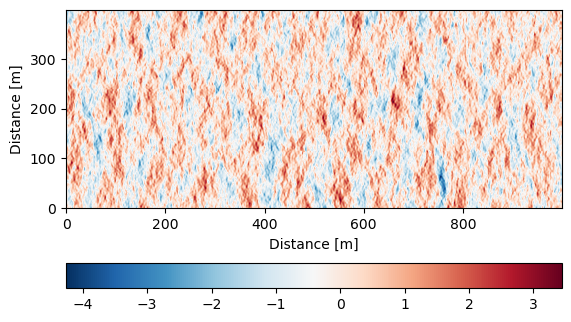

In [11]:
fig, ax = plt.subplots()
p1 = ax.pcolor(ds_ssh.x[:1000], ds_ssh.y[:400], ds_ssh.sea_surface_height[:400, :1000].values, cmap = 'RdBu_r')
ax.set_xlabel('Distance [m]')
ax.set_ylabel('Distance [m]')

plt.colorbar(p1, orientation = 'horizontal')
ax.set_aspect('equal', 'box')

### The frequency-direction and wavenumber-direction spectra

In [5]:
ds_out = E_kxky_to_kth(spec_2d.kxky_spectrum.values, spec_2d.kx.values, spec_2d.ky.values, 48)
ds_out0 = E_kth_to_Efth(ds_out)

/Users/gwen29360/Desktop/POSTDOC/Mines/S_MODE/python/src.py:397: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


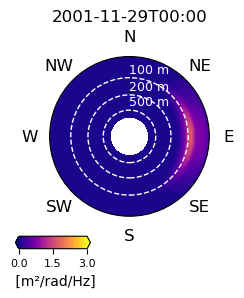

In [9]:
plot_wave_spectrum(ds_out0, 0, 3, date_obs, date_on = 'yes') # Plot the  frequency spectrum